In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_path = "../inputs/train.csv"
data = pd.read_csv(train_path)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,28104,50000.0,2,1,1,31,1,2,2,0,...,50332.0,29690.0,30246.0,2200.0,4.0,2300.0,1100.0,1400.0,1200.0,1
1,29094,330000.0,2,2,2,59,0,0,0,0,...,80589.0,76180.0,61693.0,20000.0,3500.0,19000.0,15000.0,3000.0,2139.0,0
2,11280,220000.0,2,1,2,41,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,28435,50000.0,2,2,1,45,0,0,0,0,...,8469.0,8411.0,8361.0,2124.0,2037.0,1130.0,295.0,302.0,296.0,0
4,10873,480000.0,2,3,1,42,-2,-2,-2,-2,...,0.0,790.0,0.0,0.0,0.0,0.0,790.0,0.0,0.0,0


In [3]:
#como primeira ação, vamos checar os missing values na base
colunas = list(data.columns)
for c in colunas:
    total_nas = data[c].isna().sum()
    print(f"total missing values in {c}: {total_nas}")

total missing values in ID: 0
total missing values in LIMIT_BAL: 0
total missing values in SEX: 0
total missing values in EDUCATION: 0
total missing values in MARRIAGE: 0
total missing values in AGE: 0
total missing values in PAY_0: 0
total missing values in PAY_2: 0
total missing values in PAY_3: 0
total missing values in PAY_4: 0
total missing values in PAY_5: 0
total missing values in PAY_6: 0
total missing values in BILL_AMT1: 0
total missing values in BILL_AMT2: 0
total missing values in BILL_AMT3: 0
total missing values in BILL_AMT4: 0
total missing values in BILL_AMT5: 0
total missing values in BILL_AMT6: 0
total missing values in PAY_AMT1: 0
total missing values in PAY_AMT2: 0
total missing values in PAY_AMT3: 0
total missing values in PAY_AMT4: 0
total missing values in PAY_AMT5: 0
total missing values in PAY_AMT6: 0
total missing values in target: 0


Como é comum acontecer em bases de dados do kaggle, que chegam um pouco mais limpas que as bases encontradas no mundo real, nosso dataset não possui missing value em nenhuma de suas colunas.

# Histogramas

Vamos avaliar como as variáveis numéricas estão distribuídas para checar se há algo que chame alguma atenção especial. Vamos priorizar a construção dos histogramas de forma segmentada de acordo com a variável target de modo a tentar identificar alguma evidência de padrão.

Text(0.5, 1.0, 'Histograma AGE')

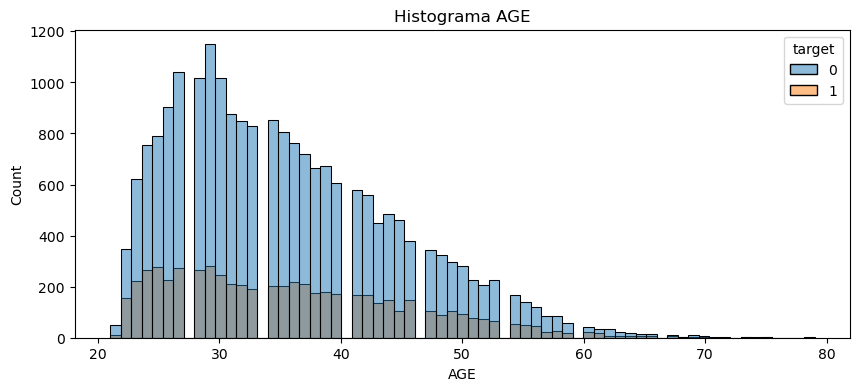

In [8]:
#age
variavel = "AGE"
plt.figure(figsize=(10, 4))
sns.histplot(data, x=variavel, hue="target")
plt.title(f"Histograma {variavel}")

Text(0.5, 1.0, 'Histograma LIMIT_BAL')

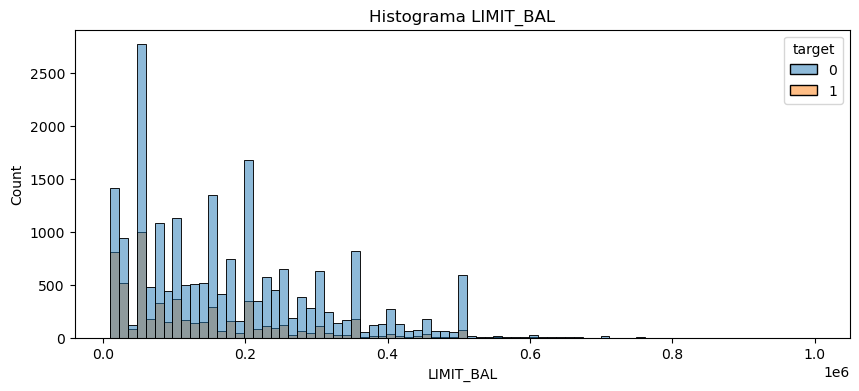

In [11]:
#LIMIT_BAL
variavel = "LIMIT_BAL"
plt.figure(figsize=(10, 4))
sns.histplot(data, x=variavel, hue="target")
plt.title(f"Histograma {variavel}")

Text(0.5, 1.0, 'Histograma BILL_AMT1')

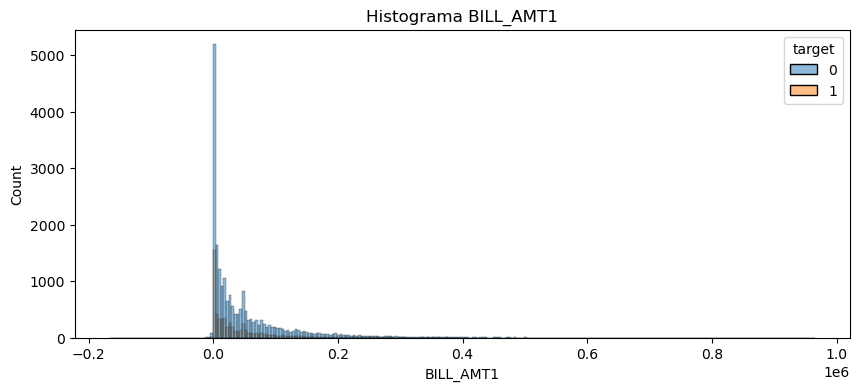

In [17]:
#BILL_AMT1
variavel = "BILL_AMT1"
plt.figure(figsize=(10, 4))
sns.histplot(data, x=variavel, hue="target")
plt.title(f"Histograma {variavel}")

Text(0.5, 1.0, 'Histograma BILL_AMT2')

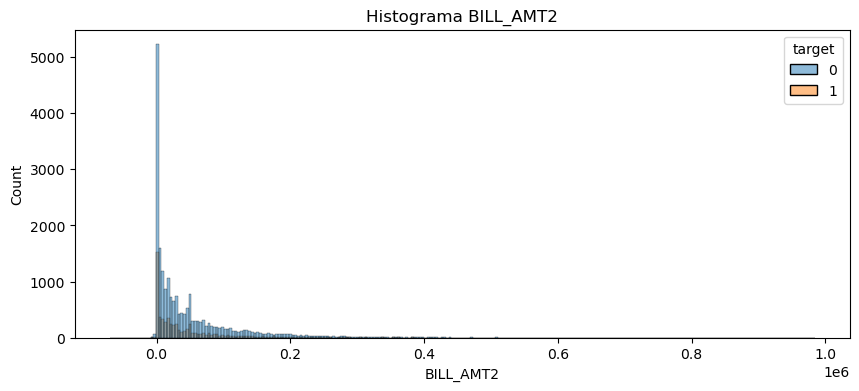

In [3]:
#BILL_AMT2
variavel = "BILL_AMT2"
plt.figure(figsize=(10, 4))
sns.histplot(data, x=variavel, hue="target")
plt.title(f"Histograma {variavel}")

Text(0.5, 1.0, 'Histograma BILL_AMT3')

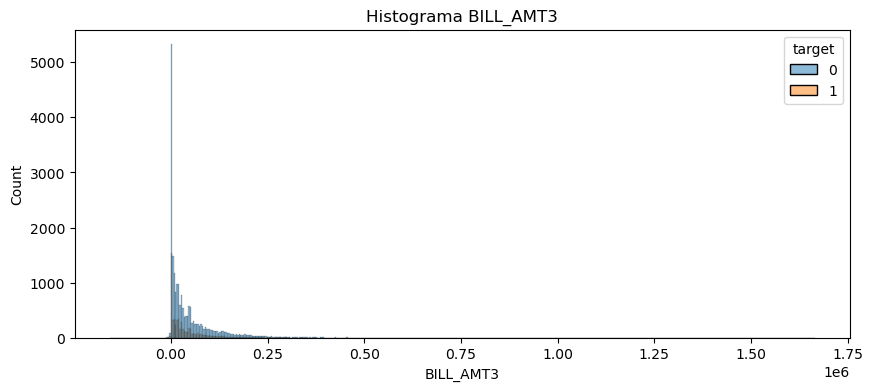

In [4]:
#BILL_AMT3
variavel = "BILL_AMT3"
plt.figure(figsize=(10, 4))
sns.histplot(data, x=variavel, hue="target")
plt.title(f"Histograma {variavel}")

Text(0.5, 1.0, 'Histograma BILL_AMT4')

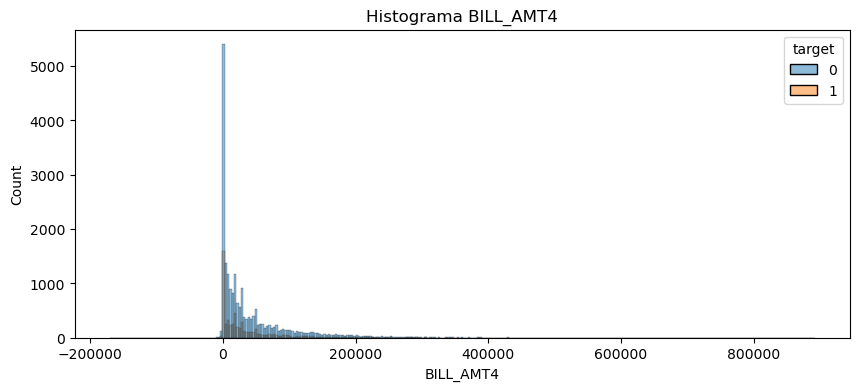

In [5]:
#BILL_AMT4
variavel = "BILL_AMT4"
plt.figure(figsize=(10, 4))
sns.histplot(data, x=variavel, hue="target")
plt.title(f"Histograma {variavel}")

Text(0.5, 1.0, 'Histograma PAY_AMT1')

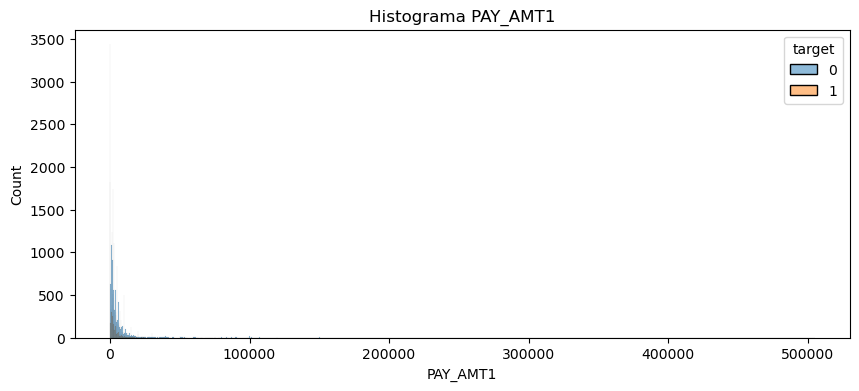

In [6]:
#PAY_AMT1
variavel = "PAY_AMT1"
plt.figure(figsize=(10, 4))
sns.histplot(data, x=variavel, hue="target")
plt.title(f"Histograma {variavel}")

Text(0.5, 1.0, 'Histograma PAY_AMT2')

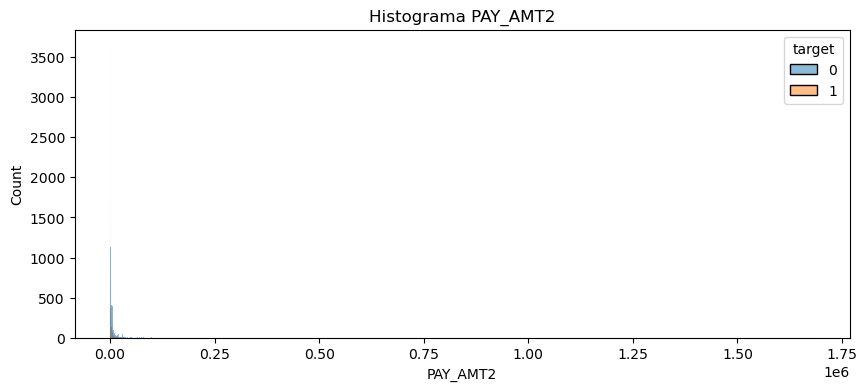

In [7]:
#PAY_AMT2
variavel = "PAY_AMT2"
plt.figure(figsize=(10, 4))
sns.histplot(data, x=variavel, hue="target")
plt.title(f"Histograma {variavel}")

Text(0.5, 1.0, 'Histograma PAY_AMT3')

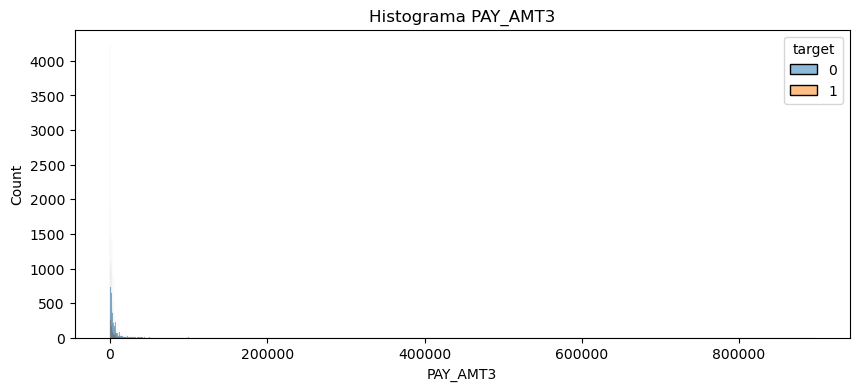

In [8]:
#PAY_AMT3
variavel = "PAY_AMT3"
plt.figure(figsize=(10, 4))
sns.histplot(data, x=variavel, hue="target")
plt.title(f"Histograma {variavel}")

### Algumas conslusões da análise preliminar

1. Aparentemente, nenhuma das features tem poder suficiente para, de forma isolada, gerar algum tipo de discriminação na variável target. Dessa forma, vamos utilizar um modelo de machine learning baseado em árvore para captar as relações entre as variáveis na discriminação do target.

2. As variáveis que representam montante, como BILL_AMT e PAY_AMT, possuem alguns valores bem distantes da distribuição geral. Nesse caso, vamos utilizar uma análise boxplot para visualizar possíveis outliers.

Text(0.5, 1.0, 'Boxplot BILL_AMT1')

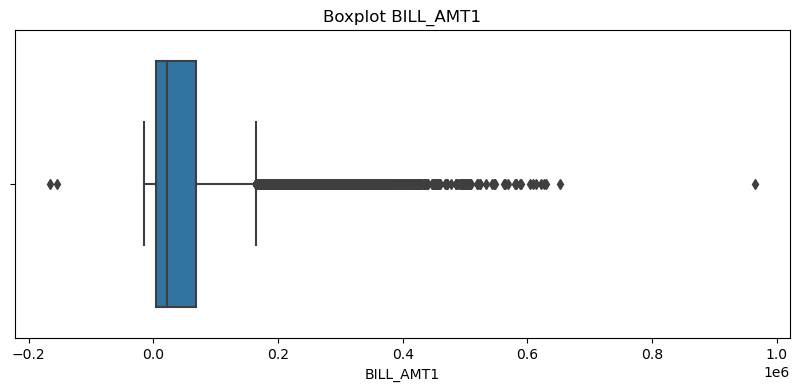

In [5]:
#BILL_AMT1
variavel = "BILL_AMT1"
plt.figure(figsize=(10, 4))
sns.boxplot(x=data[variavel], hue=data["target"])
plt.title(f"Boxplot {variavel}")

Text(0.5, 1.0, 'Boxplot BILL_AMT2')

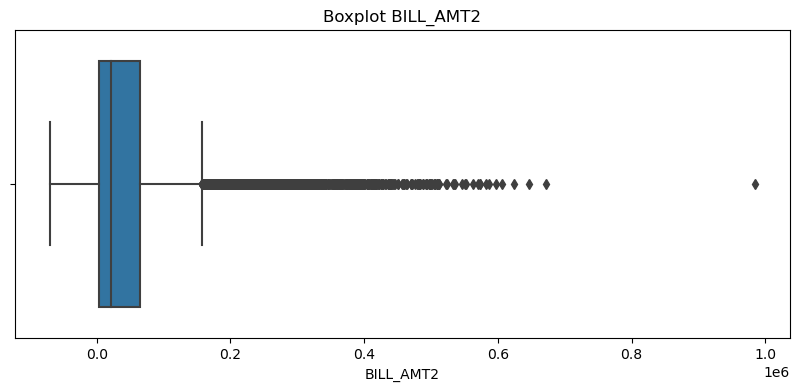

In [6]:
#BILL_AMT2
variavel = "BILL_AMT2"
plt.figure(figsize=(10, 4))
sns.boxplot(x=data[variavel], hue=data["target"])
plt.title(f"Boxplot {variavel}")

Text(0.5, 1.0, 'Boxplot BILL_AMT3')

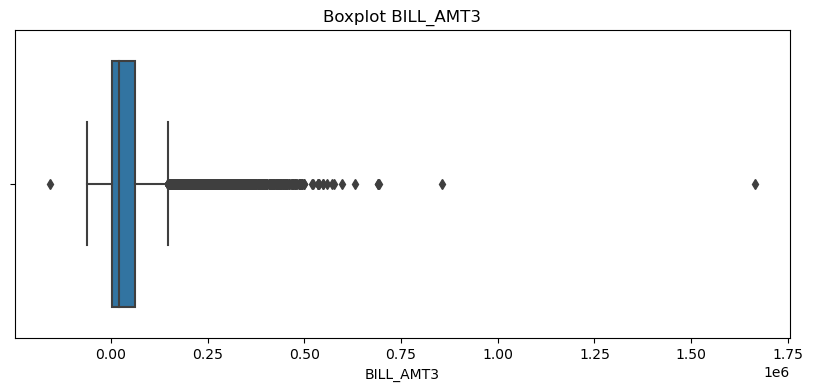

In [7]:
#BILL_AMT3
variavel = "BILL_AMT3"
plt.figure(figsize=(10, 4))
sns.boxplot(x=data[variavel], hue=data["target"])
plt.title(f"Boxplot {variavel}")

Text(0.5, 1.0, 'Boxplot PAY_AMT1')

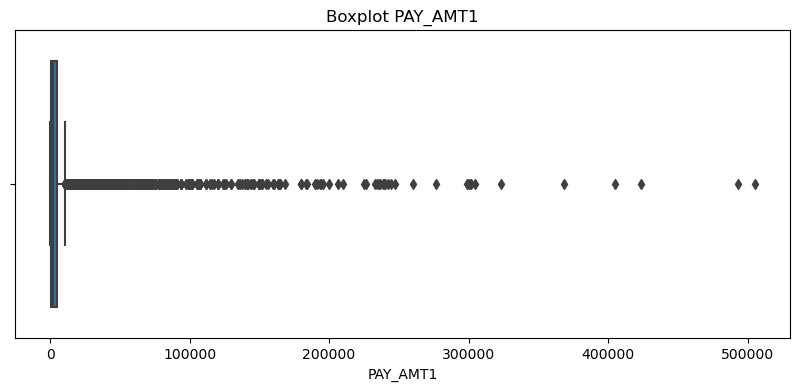

In [8]:
#PAY_AMT1
variavel = "PAY_AMT1"
plt.figure(figsize=(10, 4))
sns.boxplot(x=data[variavel], hue=data["target"])
plt.title(f"Boxplot {variavel}")

Text(0.5, 1.0, 'Boxplot PAY_AMT2')

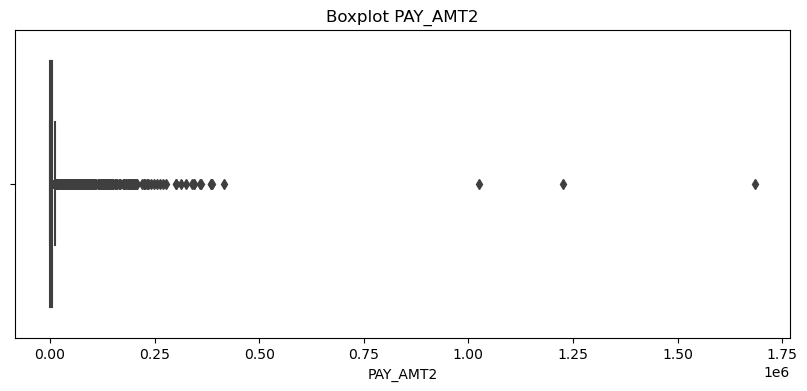

In [9]:
#PAY_AMT2
variavel = "PAY_AMT2"
plt.figure(figsize=(10, 4))
sns.boxplot(x=data[variavel], hue=data["target"])
plt.title(f"Boxplot {variavel}")

Text(0.5, 1.0, 'Boxplot PAY_AMT3')

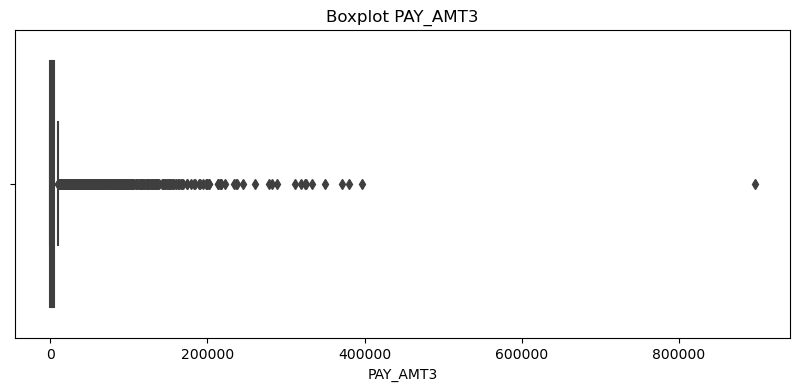

In [10]:
#PAY_AMT3
variavel = "PAY_AMT3"
plt.figure(figsize=(10, 4))
sns.boxplot(x=data[variavel], hue=data["target"])
plt.title(f"Boxplot {variavel}")

# Novas conclusões

Diante do que investigamos até aqui sobre as variáveis, a decisão tomada é de utilizar um modelo baseado em árvore, como o lightgbm, pois ele será capaz de lidar de forma mais automática com as variáveis categóricas, com as diferentes escalas das variáveis e na identificação de interações não lineares nas features.

**MAS E OS OUTLIERS?**

Como o nosso modelo será baseado em árvore, ele será naturalmente menos sensível aos outliers, pois os nós das árvores criarão dinâmicas de decisão como por exemplo "If PAY_AMT >= 5". Nesse caso, não importa se o valor da variável será de 10 ou 10000, o nó se dividirá da mesma forma na hora de tomar a decisão. E por que escolher manter os outliers na base? Do ponto de vista comportamental, outliers podem trazer informações importantes, como clientes que estão adotando hábitos de gastos fora do padrão no cartão de crédito, o que pode ajudar nosso modelo a identificar melhor os defaults. **Lembrando:** Trata-se de uma hipótese de negócio que precisa ser validada com análises mais aprofundadas.

**---------------------------x----------------------------------------x----------------------------------x-------------------x**

### Análises de correlação
Outra análise que podemos realizar é verificar as correlações entre as variáveis e avaliar, por exemplo, se os pagamentos dos clientes acompanham a geração dos valores das contas

Text(0.5, 1.0, 'Correlação PAY_AMT1 e BILL_AMT2')

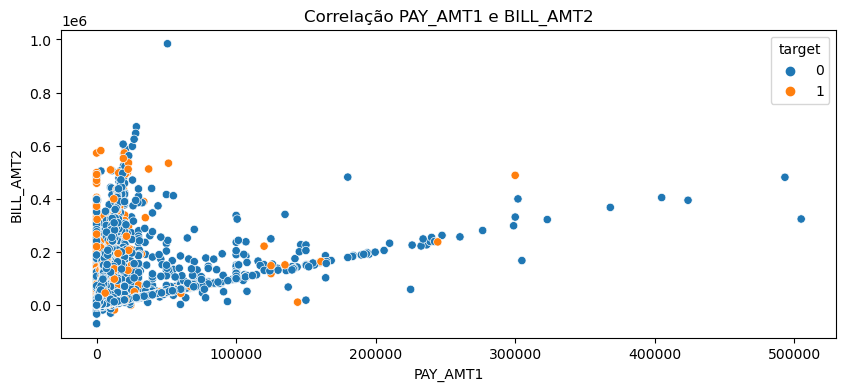

In [24]:
#PAY_AMT1 e BILL_AMT2
var1 = "PAY_AMT1"
var2 = "BILL_AMT2"
plt.figure(figsize=(10, 4))
sns.scatterplot(x=data[var1], y=data[var2], hue=data["target"])
plt.title(f"Correlação {var1} e {var2}")

Text(0.5, 1.0, 'Correlação PAY_AMT2 e BILL_AMT3')

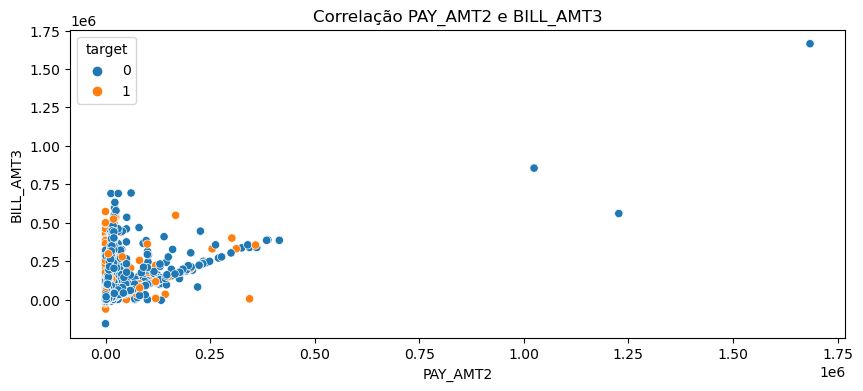

In [26]:
#PAY_AMT2 e BILL_AMT3
var1 = "PAY_AMT2"
var2 = "BILL_AMT3"
plt.figure(figsize=(10, 4))
sns.scatterplot(x=data[var1], y=data[var2], hue=data["target"])
plt.title(f"Correlação {var1} e {var2}")

Text(0.5, 1.0, 'Correlação PAY_AMT3 e BILL_AMT4')

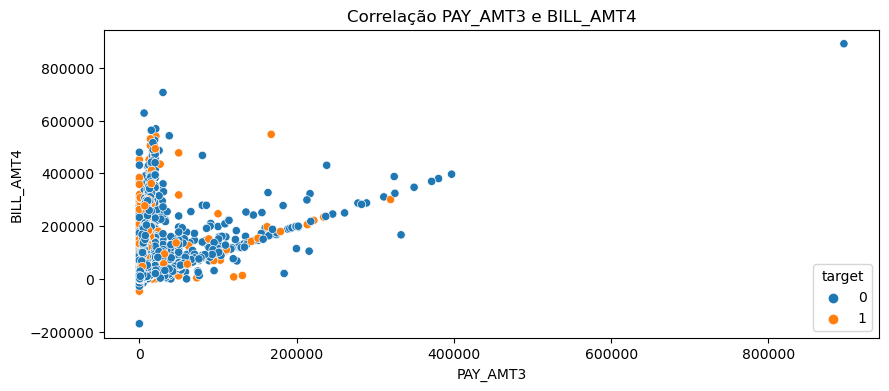

In [27]:
#PAY_AMT3 e BILL_AMT4
var1 = "PAY_AMT3"
var2 = "BILL_AMT4"
plt.figure(figsize=(10, 4))
sns.scatterplot(x=data[var1], y=data[var2], hue=data["target"])
plt.title(f"Correlação {var1} e {var2}")

Text(0.5, 1.0, 'Correlação PAY_AMT4 e BILL_AMT5')

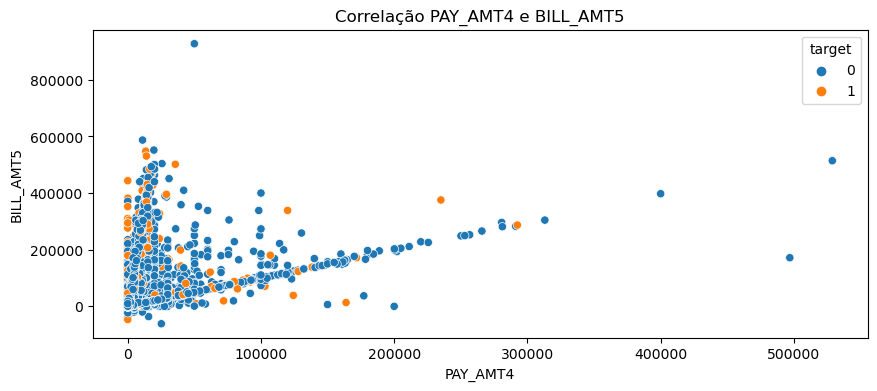

In [28]:
#PAY_AMT4 e BILL_AMT5
var1 = "PAY_AMT4"
var2 = "BILL_AMT5"
plt.figure(figsize=(10, 4))
sns.scatterplot(x=data[var1], y=data[var2], hue=data["target"])
plt.title(f"Correlação {var1} e {var2}")

### Conclusão
Vemos que a variável PAY_AMT1, por exemplo, é o valor em setmebro que na verdade foi pago em agosto, enquanto que a variável BILL_AMT2 é o valor da conta em agosto, por isso os gráficos nos mostram uma correlação entre a variável PAY_AMTi e BILL_AMTi+1. A correlação positva nos mostra o esperado: quanto mais as contas crescem, os pagamentos acompanham. Mas há exceções. Será que isso pode se relacionar com os defaults? Esperamos que o modelo possa nos ajudar com essa identificação de padrões.